# Problem 1

1. **Home Credit** is an international consumer finance provider. They provide consumer finance products that are easily accessible, affordable and manageable for customers. In order to make sure unbanked population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.
2. The main purpose of this competition is to predict the company customer's repayment abilities. 
3. These predictions will ensure that clients with ability of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful. Hence, it will help the company to discover more potential customer as well as modify their strategy for ultilizing their business.


# Problem 2

In [1]:
import pandas as pd
data = pd.read_csv('application_train.csv')

In [2]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

After running <code>pd.info()</code>, <code>pd.head()</code> and <code>pd.describe()</code>, we can see that this dataset is quite a huge dataset. It contains 122 columns and 307511 rows. The columns denotes the information of a loan including some customer's personal information and detail of services. The target variable in this dataset is column named '**TARGET**' which represents repayment capability of the customer. This variable has two values only:
 - **0** means the customer has difficulty in repayment process
 - **1** means the customer is able to repay in time

In [5]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
# Check for missing data
total_missing = data.isnull().sum().sort_values(ascending=False)
percentage = (total_missing / data.isnull().count() * 100).sort_values(ascending=False)
missing = pd.concat([total_missing,percentage], axis = 1,keys=['Number of missing values', 'Percentage'])
missing[missing['Percentage'] > 50]

,Number of missing values,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


We can see there are a lot of columns which have null value more than a half of the total size. Also, these attributes(columns) also relates to some others which can be infered from the columns' name.

<AxesSubplot:ylabel='TARGET'>

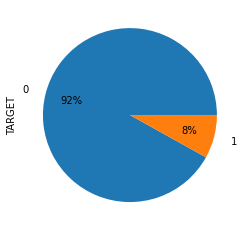

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
data['TARGET'].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2)

The distribution of target variable is remarkably imbalance with the majority of loans has the target equals to 0 which indicates that individuals did not had any problems in paying installments in given time. There are about 92% loans which is equal to about 282K with target = 0, While only 8% of the total records in this dataset representing the applicants have problems in repaying the loan.

# Problem 3

There are four question I have come up with after getting an overview of this dataset:
1. What is the percentage of successful repayment based on the loan type ?
2. Does an applicant own a car or estate ?
3. What is the family status of an applicant ?
4. What is occupation type of an applicant ?

#  Problem 4

**1. What is the percentage of successful repayment based on the loan type ?**

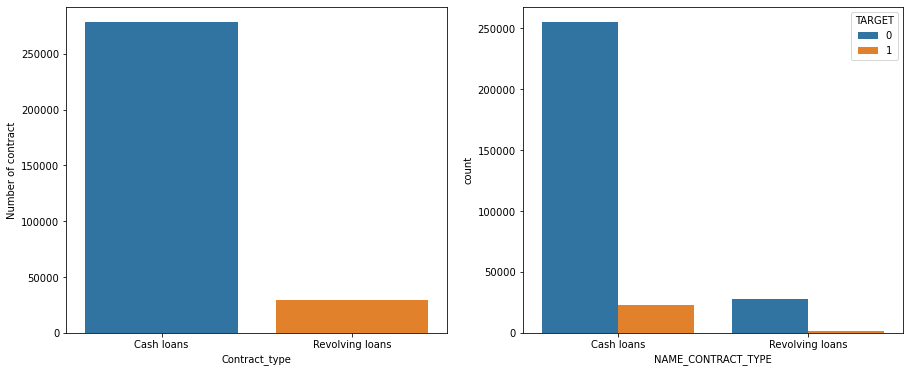

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df1 = pd.DataFrame({'Contract_type': data['NAME_CONTRACT_TYPE'].value_counts().index,
                   'Number of contract': data['NAME_CONTRACT_TYPE'].value_counts().values
                  })
df2 = data[['TARGET','NAME_CONTRACT_TYPE']]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.barplot(ax=ax1, x = 'Contract_type', y="Number of contract",data=df1)
s = sns.countplot(ax=ax2, x='NAME_CONTRACT_TYPE', hue='TARGET', data=df2)

def compute_percent(feature):
    """
        This function is used to calculate percentage of successful repayment 
        with different values in a given feature
    """
    s = data[[feature,'TARGET']]
    value = {}
    for x in s[feature].value_counts().index:
        total = s.loc[s[feature] == x].value_counts(normalize=True)
        value[x] = total[0]
    l = pd.DataFrame.from_dict(value, orient='index', columns=['Percent of successful repayment'])
    display(l)

In [9]:
# Calculate the percentage of full repayment ability 
compute_percent('NAME_CONTRACT_TYPE')

,Percent of successful repayment
Cash loans,0.916541
Revolving loans,0.945217


The left-most figure show how many cash loans contract and revolving loans contract appear in the dataset; Meanwhile, the rightmost show how many successful and unsucessful repayment of each kind of loans. The number of revolving loans contract is approximately 10 times less than that of cash loans. With the knowledge that TARGET = 1 means the person has difficulties in repayment, the percentage of people with difficulties in repayment in both contract type is almost the same (0.083459 and 0.054783) and quite low.

**2. Does an applicant own a car or estate ?**

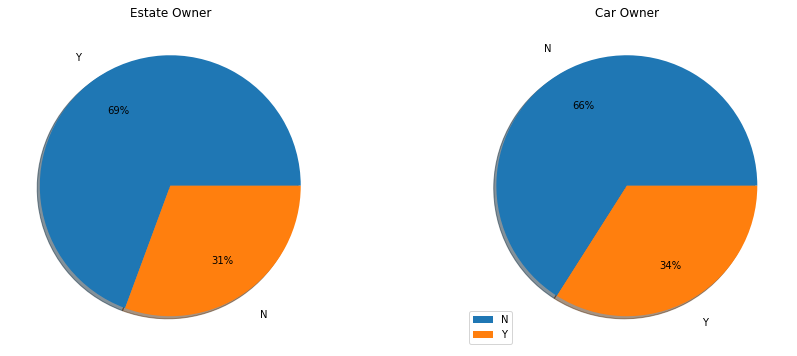

In [10]:
estate = data['FLAG_OWN_REALTY'].value_counts()
labels = estate.index
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].title.set_text('Estate Owner')
ax[0].pie(estate,labels=labels,autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2, shadow = True)
car = data['FLAG_OWN_CAR'].value_counts()

labels = car.index
ax[1].title.set_text('Car Owner')
ax[1].pie(car,labels=labels,autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2, shadow = True)

plt.legend()

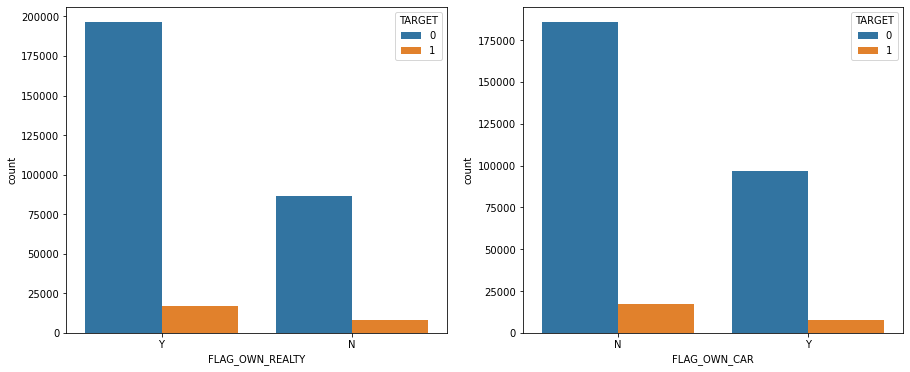

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.countplot(ax=ax1, x='FLAG_OWN_REALTY', hue="TARGET",data=data)
s = sns.countplot(ax=ax2, x='FLAG_OWN_CAR', hue='TARGET', data=data)

In [12]:
compute_percent('FLAG_OWN_CAR')
compute_percent('FLAG_OWN_REALTY')

,Percent of successful repayment
N,0.914998
Y,0.927563


,Percent of successful repayment
Y,0.920384
N,0.916751


Approximate 70% of the applicants own Real Estate, while only 34% of applicants own Car who had a loan in the past yeats. However, a higher percentage of people having payment difficulties was observed with applicants which did not owned car or which did not owned Real Estate.

**3. What is the family status of an applicant ?**

[Text(0, 0, 'Single / not married'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Civil marriage'),
 Text(3, 0, 'Widow'),
 Text(4, 0, 'Separated'),
 Text(5, 0, 'Unknown')]

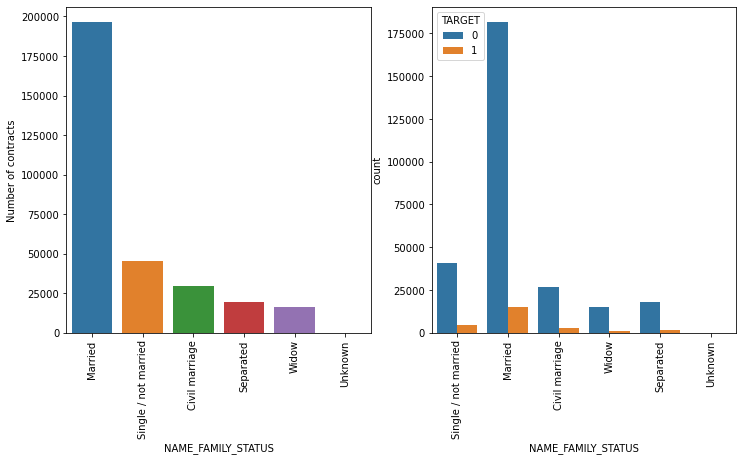

In [13]:
df = pd.DataFrame({
    'NAME_FAMILY_STATUS': data['NAME_FAMILY_STATUS'].value_counts().index,
    'Number of contracts': data['NAME_FAMILY_STATUS'].value_counts().values,
})

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.barplot(ax=ax1, x = 'NAME_FAMILY_STATUS', y="Number of contracts",data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
s = sns.countplot(ax=ax2, x='NAME_FAMILY_STATUS', hue='TARGET', data=data)
s.set_xticklabels(s.get_xticklabels(),rotation=90)

In [14]:
compute_percent('NAME_FAMILY_STATUS')

,Percent of successful repayment
Married,0.924401
Single / not married,0.901923
Civil marriage,0.900554
Separated,0.918058
Widow,0.941758
Unknown,1.000000


Most of clients are married, followed by Single/not married and civil marriage.

Regarding percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (approximately 10%), with Widow the lowest (exception being Unknown).

**4. What is occupation type of an applicant ?**

[Text(0, 0, 'Laborers'),
 Text(1, 0, 'Core staff'),
 Text(2, 0, 'Accountants'),
 Text(3, 0, 'Managers'),
 Text(4, 0, 'Drivers'),
 Text(5, 0, 'Sales staff'),
 Text(6, 0, 'Cleaning staff'),
 Text(7, 0, 'Cooking staff'),
 Text(8, 0, 'Private service staff'),
 Text(9, 0, 'Medicine staff'),
 Text(10, 0, 'Security staff'),
 Text(11, 0, 'High skill tech staff'),
 Text(12, 0, 'Waiters/barmen staff'),
 Text(13, 0, 'Low-skill Laborers'),
 Text(14, 0, 'Realty agents'),
 Text(15, 0, 'Secretaries'),
 Text(16, 0, 'IT staff'),
 Text(17, 0, 'HR staff')]

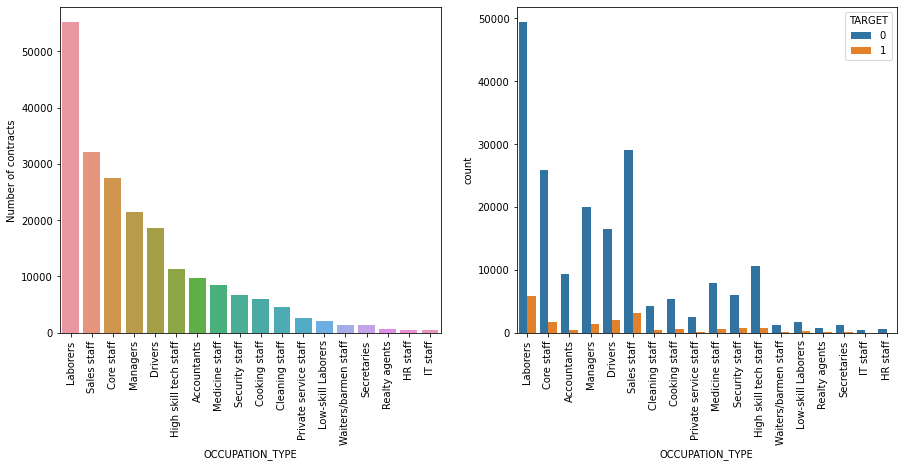

In [15]:
df = pd.DataFrame({
    'OCCUPATION_TYPE': data['OCCUPATION_TYPE'].value_counts().index,
    'Number of contracts': data['OCCUPATION_TYPE'].value_counts().values,
})

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.barplot(ax=ax1, x = 'OCCUPATION_TYPE', y="Number of contracts",data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
s = sns.countplot(ax=ax2, x='OCCUPATION_TYPE', hue='TARGET', data=data)
s.set_xticklabels(s.get_xticklabels(),rotation=90)

In [16]:
compute_percent('OCCUPATION_TYPE')

,Percent of successful repayment
Laborers,0.894212
Sales staff,0.903682
Core staff,0.936960
Managers,0.937860
Drivers,0.886739
High skill tech staff,0.938401
Accountants,0.951697
Medicine staff,0.932998
Security staff,0.892576
Cooking staff,0.895560


Laborers are the most of customers, followed by Sales staff. IT staff make the lowest amount of loans.

The category with highest percent of unsuccesfully repaid loans are Low-skill Laborers(about 82% of repayment ability), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.